# \[Kaggle\] Coffee Sales Visuzlization

SEOYEON CHOI  
2025-09-04

# Reference

-   [link](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset)
-   [ggplottop50](https://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)

In [1]:
import rpy2

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
options(repr.plot.width = 8, repr.plot.height = 8)

In [35]:
%%R
library(ggplot2)
library(dplyr)

# Data

In [5]:
%%R
df <- read.csv("../../../delete/Coffe_sales.csv") 

In [6]:
%%R
head(df)

  hour_of_day cash_type money         coffee_name Time_of_Day Weekday
1          10      card  38.7               Latte     Morning     Fri
2          12      card  38.7       Hot Chocolate   Afternoon     Fri
3          12      card  38.7       Hot Chocolate   Afternoon     Fri
4          13      card  28.9           Americano   Afternoon     Fri
5          13      card  38.7               Latte   Afternoon     Fri
6          15      card  33.8 Americano with Milk   Afternoon     Fri
  Month_name Weekdaysort Monthsort       Date            Time
1        Mar           5         3 2024-03-01 10:15:50.520000
2        Mar           5         3 2024-03-01 12:19:22.539000
3        Mar           5         3 2024-03-01 12:20:18.089000
4        Mar           5         3 2024-03-01 13:46:33.006000
5        Mar           5         3 2024-03-01 13:48:14.626000
6        Mar           5         3 2024-03-01 15:39:47.726000

-   비교 의미 없음

In [7]:
%%R
table(df['cash_type'])

cash_type
card 
3547 

-   가격 순위 확인

In [8]:
%%R
df %>%
  group_by(coffee_name) %>%
  summarise(avg_price = mean(money, na.rm = TRUE)) %>%
  arrange(desc(avg_price))

# A tibble: 8 × 2
  coffee_name         avg_price
  <chr>                   <dbl>
1 Hot Chocolate            36.0
2 Cappuccino               35.9
3 Cocoa                    35.7
4 Latte                    35.5
5 Americano with Milk      30.6
6 Americano                26.0
7 Cortado                  25.7
8 Espresso                 20.9

# Bar chart(money)

-   월 순서 정렬

In [9]:
%%R
df$Month_name <- factor(df$Month_name,
                   levels = c("Jan","Feb","Mar","Apr","May","Jun",
                              "Jul","Aug","Sep","Oct","Nov","Dec"))

In [10]:
%%R
table(df['Month_name'])

Month_name
Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec 
201 423 494 168 241 223 237 272 344 426 259 259 

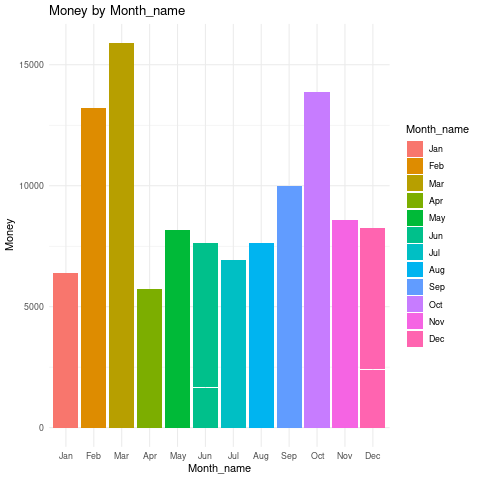

In [11]:
%%R
ggplot(df, aes(x = Month_name, y = money, fill = Month_name)) +
  geom_col() +
  labs(title = "Money by Month_name", x = "Month_name", y = "Money") +
  theme_minimal()

-   요일별 구분해보기

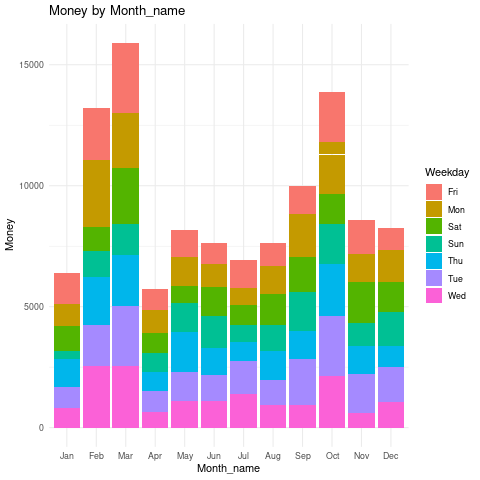

In [12]:
%%R
ggplot(df, aes(x = Month_name, y = money, fill = Weekday)) +
  geom_col() +
  labs(title = "Money by Month_name", x = "Month_name", y = "Money") +
  theme_minimal()

-   오전오후밤 구분해보기

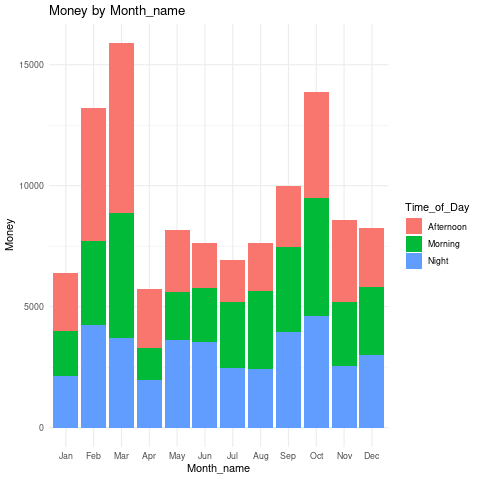

In [13]:
%%R
ggplot(df, aes(x = Month_name, y = money, fill = Time_of_Day)) +
  geom_col() +
  labs(title = "Money by Month_name", x = "Month_name", y = "Money") +
  theme_minimal()

-   요일 순 정렬 factor

In [14]:
%%R
df$Weekday <- factor(df$Weekday, 
                     levels = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun"))

In [15]:
%%R
table(df['Weekday'])

Weekday
Mon Tue Wed Thu Fri Sat Sun 
544 572 500 510 532 470 419 

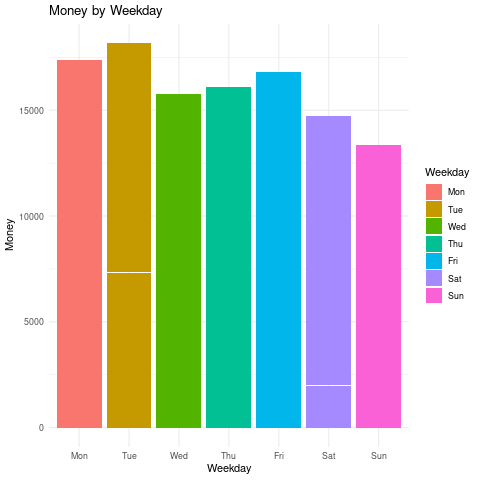

In [16]:
%%R
ggplot(df, aes(x = Weekday, y = money, fill = Weekday)) +
  geom_col() +
  labs(title = "Money by Weekday", x = "Weekday", y = "Money") +
  theme_minimal()

-   오전오후밤 구분해보기

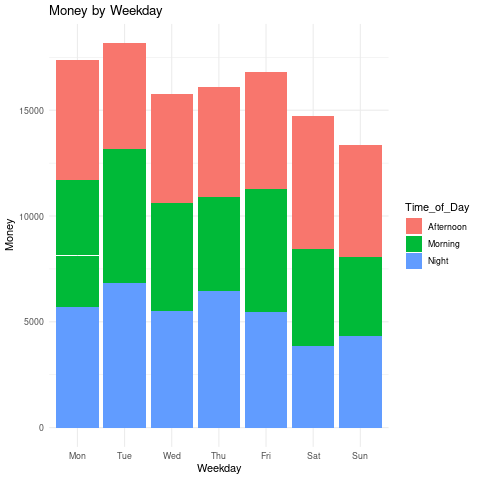

In [17]:
%%R
ggplot(df, aes(x = Weekday, y = money, fill = Time_of_Day)) +
  geom_col() +
  labs(title = "Money by Weekday", x = "Weekday", y = "Money") +
  theme_minimal()

-   메뉴별 판매액

In [18]:
%%R
table(df['coffee_name'])

coffee_name
          Americano Americano with Milk          Cappuccino               Cocoa 
                564                 809                 486                 239 
            Cortado            Espresso       Hot Chocolate               Latte 
                287                 129                 276                 757 

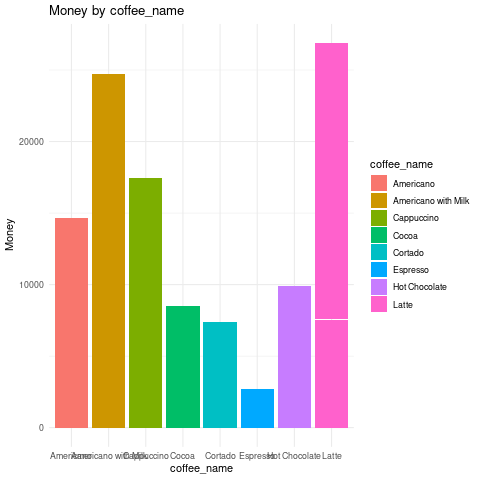

In [19]:
%%R
ggplot(df, aes(x = coffee_name, y = money, fill = coffee_name)) +
  geom_col() +
  labs(title = "Money by coffee_name", x = "coffee_name", y = "Money") +
  theme_minimal()

-   메뉴별 음료 정보 선호도 확인

In [20]:
%%R
df$Time_of_Day <- factor(df$Time_of_Day, 
                     levels = c("Morning","Afternoon","Night"))

In [21]:
%%R
table(df['Time_of_Day'])

Time_of_Day
  Morning Afternoon     Night 
     1181      1205      1161 

-   팔리는 수도 비슷

`summarise()` has grouped output by 'Time_of_Day'. You can override using the
`.groups` argument.

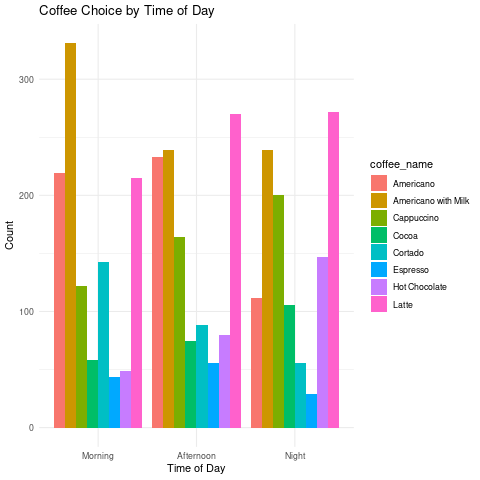

In [22]:
%%R
df %>%
  group_by(Time_of_Day, coffee_name) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = Time_of_Day, y = count, fill = coffee_name)) +
  geom_col(position = "dodge") +
  labs(title = "Coffee Choice by Time of Day", x = "Time of Day", y = "Count") +
  theme_minimal()

-   아침엔 americano with milk 압도적

    -   라떼랑 아메리카노는 비슷

-   오후엔 라떼

    -   아메리카노랑 아메리카노윗밀크는 비슷

-   밤에도 라떼

-   중앙값 기준으로 low, high 나눠서 값에 따라 판매액 차이가 있는지

In [23]:
%%R
median(df$money)

[1] 32.82

`summarise()` has grouped output by 'Time_of_Day'. You can override using the
`.groups` argument.

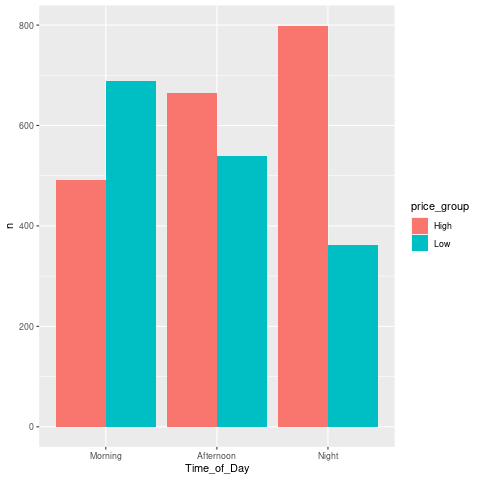

In [24]:
%%R
df %>%
  mutate(price_group = ifelse(money >= median(money), "High", "Low")) %>%
  group_by(Time_of_Day, price_group) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = Time_of_Day, y = n, fill = price_group)) +
  geom_col(position = "dodge")

-   아침에는 저렴
-   저녁에는 비싼 음료 선호

# Line chart

-   시간대별 판매액

In [25]:
%%R
table(df['hour_of_day'])

hour_of_day
  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
  5  88 235 242 328 283 241 225 225 236 278 237 218 229 169 195 113 

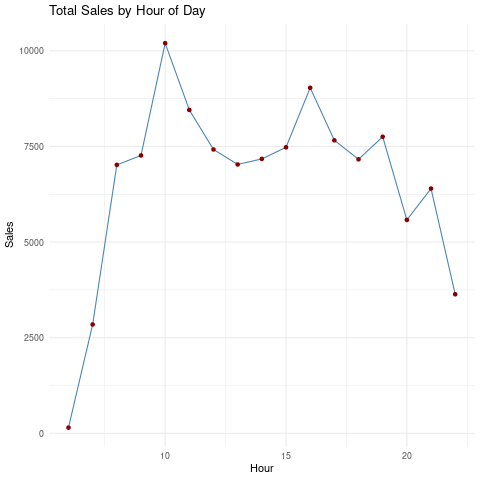

In [26]:
%%R
df %>%
  group_by(hour_of_day) %>%
  summarise(total_money = sum(money)) %>%
  ggplot(aes(x = hour_of_day, y = total_money)) +
  geom_line(color = "steelblue") +
  geom_point(color = "darkred") +
  labs(title = "Total Sales by Hour of Day", x = "Hour", y = "Sales") +
  theme_minimal()


-   오전대가 가장 많이 팔림, 그리고 오후 15시넘어서

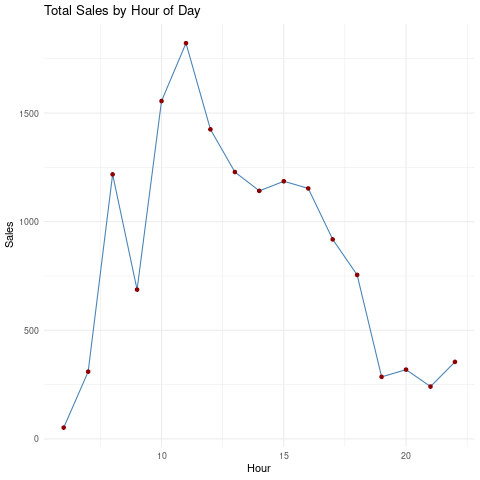

In [28]:
%%R
df %>%
  filter(coffee_name == "Americano") %>% 
  group_by(hour_of_day) %>%
  summarise(total_money = sum(money)) %>%
  ggplot(aes(x = hour_of_day, y = total_money)) +
  geom_line(color = "steelblue") +
  geom_point(color = "darkred") +
  labs(title = "Total Sales by Hour of Day", x = "Hour", y = "Sales") +
  theme_minimal()

-   11시에 아메리카노가 가장 많이 팔렸다!

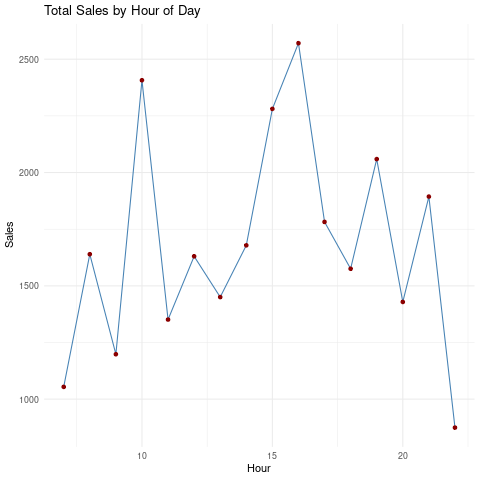

In [34]:
%%R
df %>%
  filter(coffee_name == "Latte") %>% 
  group_by(hour_of_day) %>%
  summarise(total_money = sum(money)) %>%
  ggplot(aes(x = hour_of_day, y = total_money)) +
  geom_line(color = "steelblue") +
  geom_point(color = "darkred") +
  labs(title = "Total Sales by Hour of Day", x = "Hour", y = "Sales") +
  theme_minimal()

-   10,16시에 라때가 많이 팔리는 경향

-   주중 주말 판매액 비교

`summarise()` has grouped output by 'Weekend'. You can override using the
`.groups` argument.

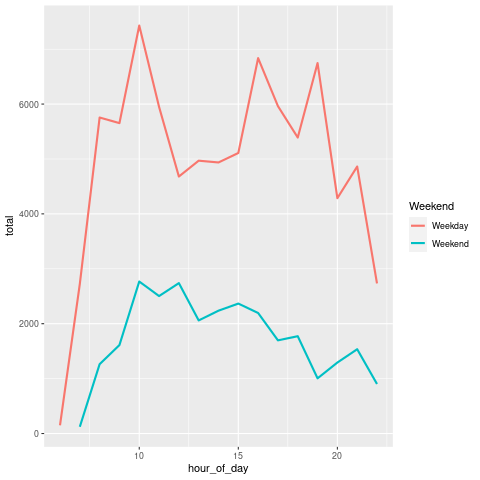

In [29]:
%%R
df %>%
  mutate(Weekend = ifelse(Weekday %in% c("Sat","Sun"), "Weekend", "Weekday")) %>%
  group_by(Weekend, hour_of_day) %>%
  summarise(total = sum(money)) %>%
  ggplot(aes(x = hour_of_day, y = total, color = Weekend)) +
  geom_line(size=1)

# Heat map

-   시간대 및 요일별로 판매액 큰 구간 확인 가능

`summarise()` has grouped output by 'Weekday'. You can override using the
`.groups` argument.

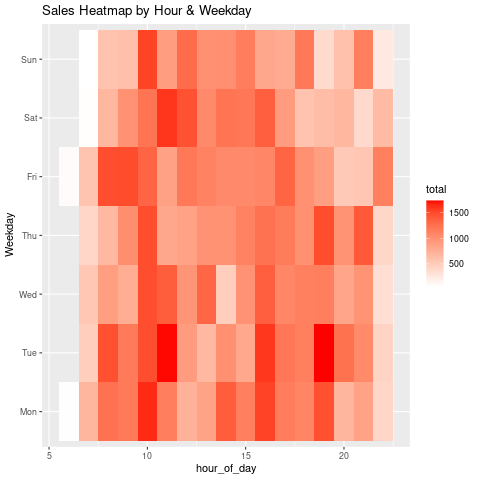

In [30]:
%%R
df %>%
  group_by(Weekday, hour_of_day) %>%
  summarise(total = sum(money)) %>%
  ggplot(aes(x = hour_of_day, y = Weekday, fill = total)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Sales Heatmap by Hour & Weekday")
